<div style="display: flex; justify-content: center; align-items: center; background-color: #644FBA; color: #FFFF; padding: 30px;">
<h1 style="margin: 0;">Implementing Support Vector Machine (SVM) from Scratch</h1>
</div>


<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h1 style="color: #644FBA; margin-top: 0;">Objective of This Lab</h1>
  <p style="color: #1E173B;">
 Implement a Support Vector Machine ( SVM ) classifier from scratch without using built in machine learning libraries like Scikit-Learn , The goal is understand the mathematical foundation and algorithmic setps behind SVM 
  </p>

<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Table of Contents</h2>
  <ul>
    <li><a href="#1" style="text-decoration: none; color: #644FBA;">Importing Required Libraries</a></li>
    <li><a href="#2" style="text-decoration: none; color: #644FBA;">Defining Custom Classes and Functions</a></li>
    <li><a href="#3" style="text-decoration: none; color: #644FBA;">Training and Evaluating the SVM Classifier</a>
      <ul>
        <li><a href="#31" style="text-decoration: none; color: #644FBA;">Case 1 : Generating Well-Distributed Synthetic Data</a></li>
        <li><a href="#32" style="text-decoration: none; color: #644FBA;">Case 2 : Using Real-World Data</a></li>
</ul>
    </li>
</ul>
</div>

<div id="1" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Importing Required Libraries</h2>
</div>    

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt 
import seaborn as sns

---

<div id="2" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Defining Custom Classes and Functions</h2>
</div>  

In [2]:
from svm.classes import SVM #   SVM  from secrtch 
from svm.visualization import plot_scatter_before_after_scaling
from svm.summary import svm_summary
from svm.visualization import  plot_decision_boundary_test_data

----

<div id="3" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Training and Evaluating the SVM Classifier</h2>
</div>  

<div id="31" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
  <h3 style="color: #E97F61; margin-top: 0;">Case 1 : Generating Well-Distributed Synthetic Data
</h3>
</div>    

In [3]:
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)

In [4]:
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [5]:
clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

Epoch 0: Training Accuracy = 1.0000


In [6]:
def accuracy(y_true, y_pred):
   accuracy = np.sum(y_true == y_pred) / len(y_true)
   return accuracy

print(" SVM classification accuracy ", accuracy(y_test, predictions))

 SVM classification accuracy  1.0


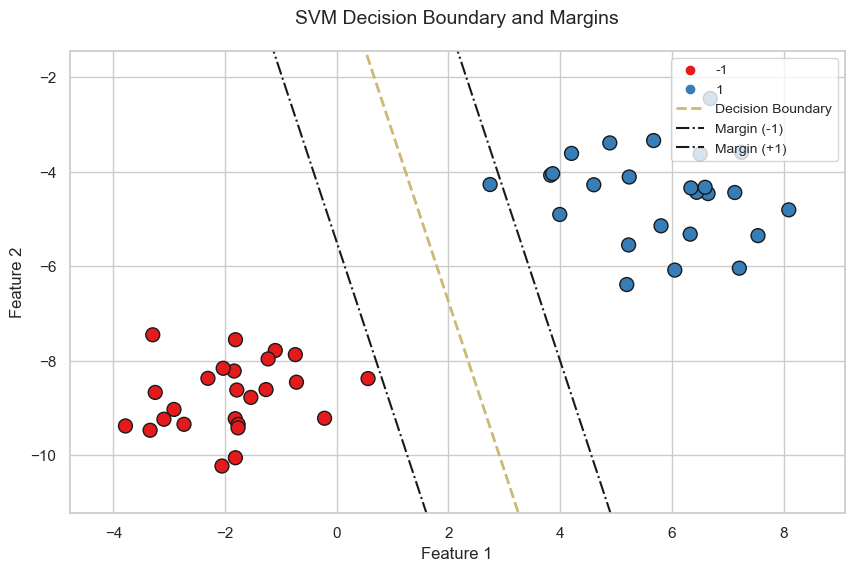

In [7]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

def visualize_svm(classifier, X, y):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", s=100, edgecolor="k", linewidth=1)
    
    x0_1, x0_2 = np.amin(X[:, 0]), np.amax(X[:, 0])
    
    x1_1 = get_hyperplane_value(x0_1, classifier.w, classifier.b, 0)
    x1_2 = get_hyperplane_value(x0_2, classifier.w, classifier.b, 0)
    x1_1_m = get_hyperplane_value(x0_1, classifier.w, classifier.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, classifier.w, classifier.b, -1)
    x1_1_p = get_hyperplane_value(x0_1, classifier.w, classifier.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, classifier.w, classifier.b, 1)
    
    plt.plot([x0_1, x0_2], [x1_1, x1_2], "y--", linewidth=2, label="Decision Boundary")
    plt.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k-.", linewidth=1.5, label="Margin (-1)")
    plt.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k-.", linewidth=1.5, label="Margin (+1)")
    
    plt.xlim([x0_1 - 1, x0_2 + 1])
    plt.ylim([np.amin(X[:, 1]) - 1, np.amax(X[:, 1]) + 1])
    
    plt.title("SVM Decision Boundary and Margins", fontsize=14, pad=20)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.legend(loc="upper right", fontsize=10)
    plt.show()
visualize_svm(clf , X , y )

-------

<div id="32" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
  <h3 style="color: #E97F61; margin-top: 0;">Case 2 : Using Real-World Data
</h3>
</div>    

In [8]:
dataset = pd.read_csv('dataset/Social_Network_Ads.csv')
X = dataset.iloc[:, :  -1].values
y = dataset.iloc[:, -1].values

In [9]:
y_two = np.where(y <= 0, -1, 1)

In [10]:
dataset.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_two, test_size = 0.25, random_state = 0)

In [12]:
X_train_base = X_train

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

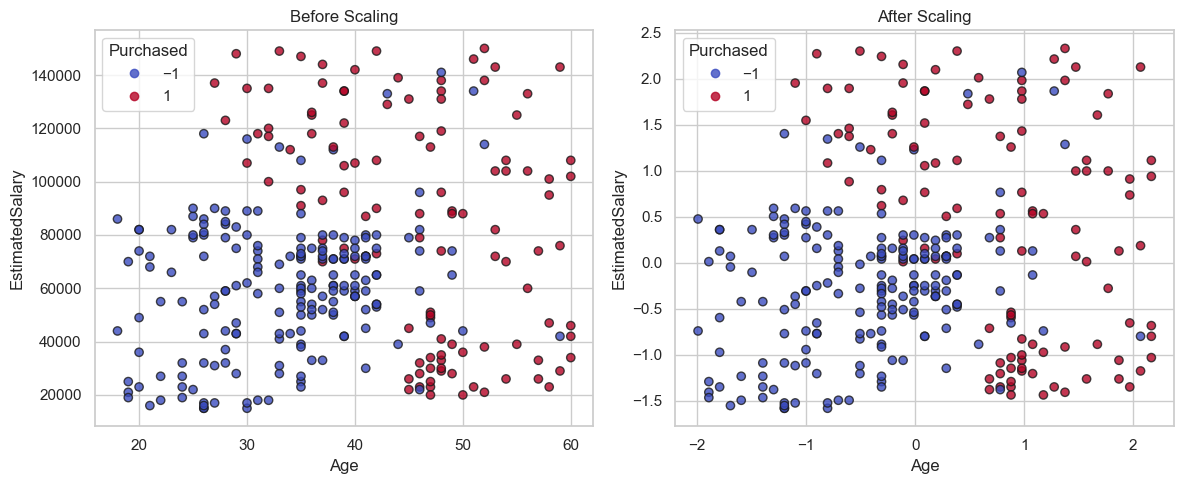

In [14]:
plot_scatter_before_after_scaling(X_train_base, X_train,y_train , class_name="Purchased" ,  feature_names=["Age", "EstimatedSalary"] )

In [15]:
classifier = SVM(learning_rate=0.0009, lambda_param=0.0055 , C = 10 ,  n_iters=5000)

classifier.fit(X_train, y_train)

Epoch 0: Training Accuracy = 0.8267
Epoch 1000: Training Accuracy = 0.8233
Epoch 2000: Training Accuracy = 0.8200
Epoch 3000: Training Accuracy = 0.8200
Epoch 4000: Training Accuracy = 0.8200


In [16]:
classifier.predict(sc.transform([[30,87000]]))

array([-1.])

In [17]:
y_pred = classifier.predict(X_test)

print(y_pred)

[-1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1.  1.  1.]


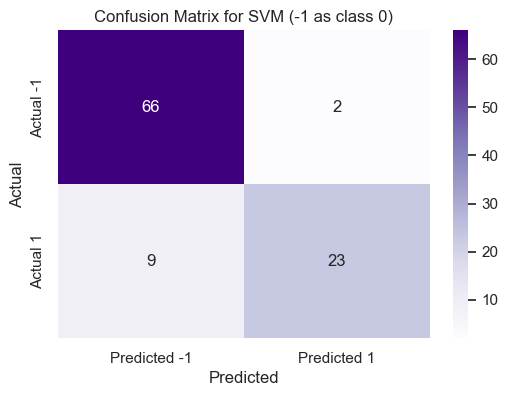


Confusion Matrix Details :
╒═════════════════════╤═════════╕
│ Metric              │   Value │
╞═════════════════════╪═════════╡
│ True Positive (TP)  │      23 │
├─────────────────────┼─────────┤
│ True Negative (TN)  │      66 │
├─────────────────────┼─────────┤
│ False Positive (FP) │       2 │
├─────────────────────┼─────────┤
│ False Negative (FN) │       9 │
╘═════════════════════╧═════════╛

Performance Metrics :
╒═══════════╤═════════╕
│ Metric    │ Value   │
╞═══════════╪═════════╡
│ Accuracy  │ 89.00%  │
├───────────┼─────────┤
│ Precision │ 92.00%  │
├───────────┼─────────┤
│ Recall    │ 71.88%  │
├───────────┼─────────┤
│ F1 Score  │ 80.70%  │
╘═══════════╧═════════╛


In [18]:
svm_summary(y_test ,y_pred)

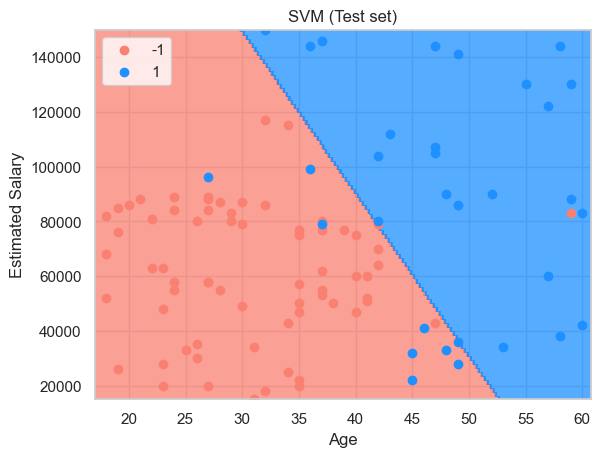

In [19]:
plot_decision_boundary_test_data(X_test, y_test, classifier, sc)